# Import Module

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn.metrics import mean_squared_error
from tqdm.notebook import tqdm

# Stock Data 
training data
start: 2015/01/01
end: 2019/11/01 

testing data 
start: 2019/12/01
end: 2020/01/01

In [2]:
ticker = 'bbl'.upper()

In [3]:
df = web.DataReader(ticker, 'yahoo', '2016-01-01', '2021-02-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,22.879999,22.540001,22.549999,22.650000,1307300.0,16.349421
2016-01-04,22.290001,21.690001,21.820000,22.240000,2625300.0,16.053474
2016-01-05,22.360001,21.889999,22.340000,22.250000,1911600.0,16.060692
2016-01-06,21.020000,20.629999,20.709999,20.870001,2689200.0,15.064567
2016-01-07,20.059999,19.549999,19.730000,19.580000,2731000.0,14.133409
...,...,...,...,...,...,...
2021-01-26,58.439999,57.669998,57.810001,58.189999,1601800.0,56.413609
2021-01-27,57.049999,55.380001,55.689999,55.840000,4422200.0,54.135349
2021-01-28,57.029999,56.259998,56.480000,56.660000,1947100.0,54.930317


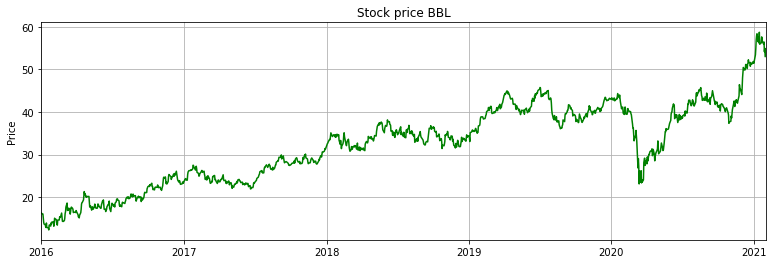

In [4]:
plt.figure(figsize=(13,4))
plt.title('Stock price '+ ticker)
plt.ylabel('Price')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['Adj Close'], color='g')
plt.show()

In [5]:
y = df['Adj Close'].values.astype(float)

test_size = 7
window_size = 120
train_set = y[:-test_size]
test_set = y[-test_size:]

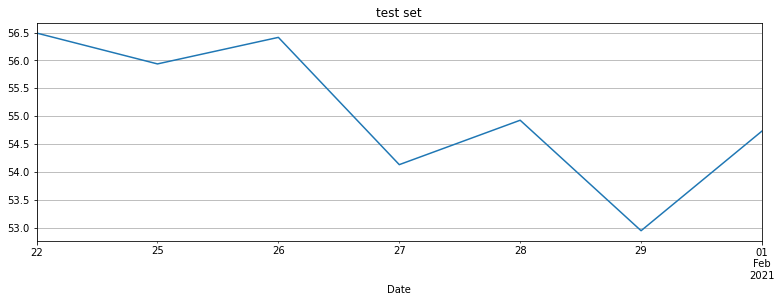

In [6]:
df['Adj Close'].iloc[-test_size:].plot(figsize=(13,4))
plt.title('test set')
plt.grid(True)

# Normalizing data
convert to range [-1, 1]

In [7]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_norm = scaler.fit_transform(train_set.reshape(-1, 1))
test_norm = scaler.transform(test_set.reshape(-1, 1))

In [8]:
train_norm

array([[-0.82627649],
       [-0.83904097],
       [-0.83872968],
       ...,
       [ 0.89337317],
       [ 0.95316775],
       [ 0.93435137]])

In [9]:
test_norm

array([[0.90508127],
       [0.88124699],
       [0.90173601],
       [0.80347218],
       [0.83776001],
       [0.75245851],
       [0.82939701]])

# Input data and label
window size = 120

[1, 2, 3, ...,120] predict ==> [121]

In [10]:
X_train = []
y_train = []
for i in range(window_size, len(train_norm)):
    X_train.append(train_norm[i-120:i,0])
    y_train.append(train_norm[i,0])

X_train,y_train = np.array(X_train), np.array(y_train) 

In [11]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [12]:
X_train.shape

(1153, 120, 1)

In [13]:
y_train

array([-0.70822677, -0.78177344, -0.81460129, ...,  0.89337317,
        0.95316775,  0.93435137])

In [14]:
X_test = []
y_test = []

seq = train_norm[-(window_size-1):]

for i in range(len(test_norm)):
    
    seq = np.array(seq[-(window_size-1):], dtype=np.float32)
    
    seq = np.append(seq, test_norm[i])
    
    X_test.append(seq)
    y_test.append(test_norm[i])

X_test,y_test = np.array(X_test), np.array(y_test) 

In [15]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(7, 120, 1)

In [16]:
y_test.shape

(7, 1)

# 1. LSTM network
lstm 6 layers 50 nodes

fully connected 1 l layer

In [17]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
        

# Training
100 epochs

In [18]:
model.fit(X_train, 
          y_train, 
          epochs=100,
          batch_size=32 )
model.save_weights(f'model/{ticker}.h5')

Epoch 1/100
37/37 [==============================] - 6s 154ms/step - loss: 0.0390
Epoch 2/100
37/37 [==============================] - 6s 152ms/step - loss: 0.0170
Epoch 3/100
37/37 [==============================] - 6s 155ms/step - loss: 0.0193
Epoch 4/100
37/37 [==============================] - 6s 158ms/step - loss: 0.0137
Epoch 5/100
37/37 [==============================] - 6s 161ms/step - loss: 0.0119
Epoch 6/100
37/37 [==============================] - 6s 163ms/step - loss: 0.0119
Epoch 7/100
37/37 [==============================] - 6s 163ms/step - loss: 0.0155
Epoch 8/100
37/37 [==============================] - 6s 163ms/step - loss: 0.0096
Epoch 9/100
37/37 [==============================] - 6s 160ms/step - loss: 0.0093
Epoch 10/100
37/37 [==============================] - 6s 162ms/step - loss: 0.0086
Epoch 11/100
37/37 [==============================] - 6s 160ms/step - loss: 0.0086
Epoch 12/100
37/37 [==============================] - 6s 161ms/step - loss: 0.0092
Epoch 13/100


# Loss

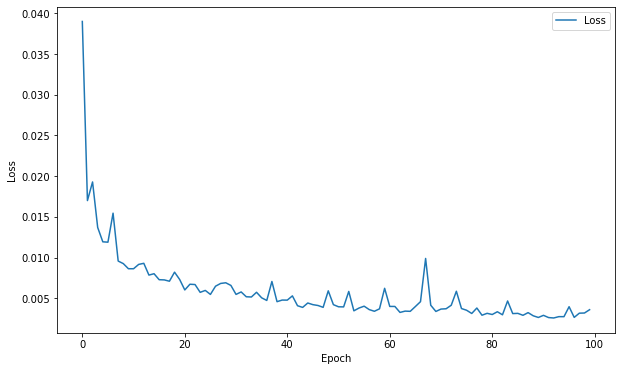

In [19]:
losses = pd.DataFrame(model.history.history['loss'],columns=['loss'])
losses['loss'].plot(figsize=(10,6), label='Loss');
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Testing

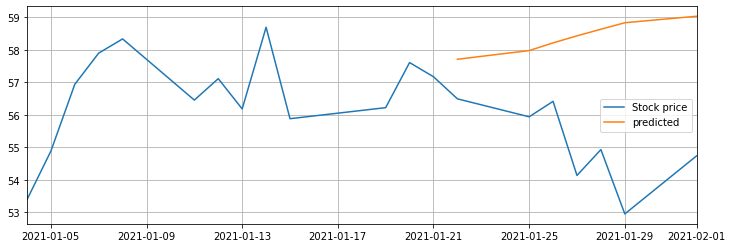

In [20]:
model.load_weights(f'model/{ticker}.h5')
future = 7
window_size = 120
preds = train_norm[-window_size:].tolist()

for i in range(future):
    seq = np.array(preds[-window_size:], dtype=np.float32)
    seq = np.reshape(seq, (seq.shape[1], seq.shape[0], 1))
    predict = model.predict(seq)
    preds.append(predict)

true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))
df1 = pd.DataFrame(true_predictions, index=df.tail(7).index, columns=['pred'])


plt.figure(figsize=(12,4))
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['Adj Close'].iloc[-20:], label='Stock price')
plt.plot(df1['pred'], label='predicted')
plt.legend()

# Absolute mean squared error

In [21]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(true_predictions.reshape(1, -1), df['Adj Close'][-7:].values.reshape(1, -1)))

3.663649644144497

150 epochs

In [23]:
model.fit(X_train, 
          y_train, 
          epochs=150,
          validation_data=(X_test, y_test),
          batch_size=32 )
model.save_weights(f'model/{ticker}.h5')

Epoch 1/150
37/37 [==============================] - 8s 206ms/step - loss: 0.0384 - val_loss: 0.2144
Epoch 2/150
37/37 [==============================] - 6s 156ms/step - loss: 0.0222 - val_loss: 0.0886
Epoch 3/150
37/37 [==============================] - 6s 159ms/step - loss: 0.0164 - val_loss: 0.0911
Epoch 4/150
37/37 [==============================] - 6s 162ms/step - loss: 0.0148 - val_loss: 0.0645
Epoch 5/150
37/37 [==============================] - 6s 169ms/step - loss: 0.0143 - val_loss: 0.0220
Epoch 6/150
37/37 [==============================] - 6s 169ms/step - loss: 0.0129 - val_loss: 0.0468
Epoch 7/150
37/37 [==============================] - 6s 167ms/step - loss: 0.0119 - val_loss: 0.0194
Epoch 8/150
37/37 [==============================] - 6s 167ms/step - loss: 0.0122 - val_loss: 0.0747
Epoch 9/150
37/37 [==============================] - 6s 166ms/step - loss: 0.0100 - val_loss: 0.0524
Epoch 10/150
37/37 [==============================] - 6s 167ms/step - loss: 0.0090 - val_lo

# Loss

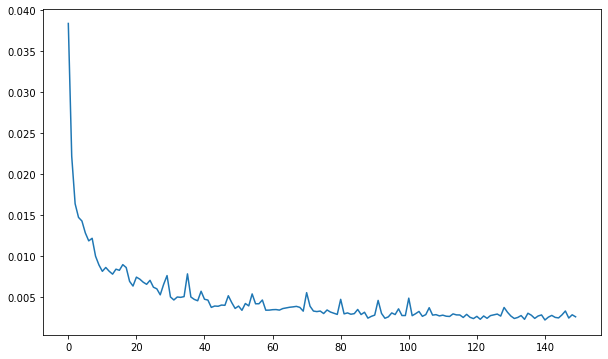

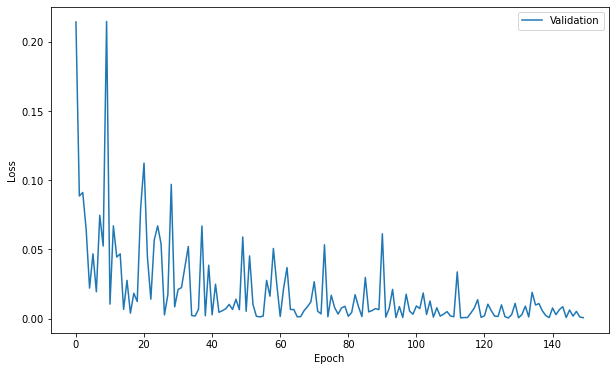

In [24]:
losses = pd.DataFrame(model.history.history)
losses['loss'].plot(figsize=(10,6), label='Loss');
plt.show()
losses['val_loss'].plot(figsize=(10,6), label='Validation');
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Testing

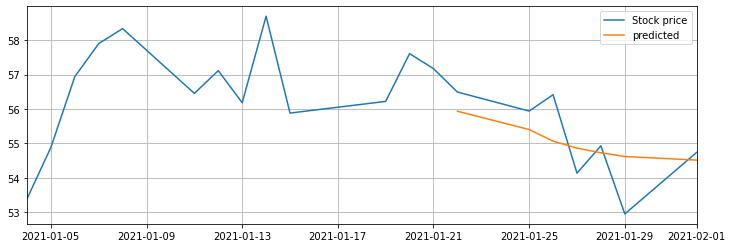

In [25]:
model.load_weights(f'model/{ticker}.h5')
future = 7
window_size = 120
preds = train_norm[-window_size:].tolist()

for i in range(future):
    seq = np.array(preds[-window_size:], dtype=np.float32)
    seq = np.reshape(seq, (seq.shape[1], seq.shape[0], 1))
    predict = model.predict(seq)
    preds.append(predict)

true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))
df1 = pd.DataFrame(true_predictions, index=df.tail(7).index, columns=['pred'])


plt.figure(figsize=(12,4))
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['Adj Close'].iloc[-20:], label='Stock price')
plt.plot(df1['pred'], label='predicted')
plt.legend()

# Absolute mean squared error


In [26]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(true_predictions.reshape(1, -1), df['Adj Close'][-7:].values.reshape(1, -1)))

0.9110897497321071

50 epochs

In [19]:
model.fit(X_train, 
          y_train, 
          epochs=50,
          validation_data=(X_test, y_test),
          batch_size=32 )
model.save_weights(f'model/{ticker}.h5')

Epoch 1/50
37/37 [==============================] - 8s 213ms/step - loss: 0.0401 - val_loss: 0.1408
Epoch 2/50
37/37 [==============================] - 6s 154ms/step - loss: 0.0189 - val_loss: 0.0077
Epoch 3/50
37/37 [==============================] - 6s 161ms/step - loss: 0.0149 - val_loss: 0.0542
Epoch 4/50
37/37 [==============================] - 6s 164ms/step - loss: 0.0144 - val_loss: 0.0340
Epoch 5/50
37/37 [==============================] - 6s 169ms/step - loss: 0.0148 - val_loss: 0.0248
Epoch 6/50
37/37 [==============================] - 6s 170ms/step - loss: 0.0118 - val_loss: 0.0084
Epoch 7/50
37/37 [==============================] - 6s 155ms/step - loss: 0.0143 - val_loss: 0.0046
Epoch 8/50
37/37 [==============================] - 6s 157ms/step - loss: 0.0113 - val_loss: 0.1293
Epoch 9/50
37/37 [==============================] - 6s 159ms/step - loss: 0.0095 - val_loss: 0.1220
Epoch 10/50
37/37 [==============================] - 6s 159ms/step - loss: 0.0094 - val_loss: 0.2502

# Loss

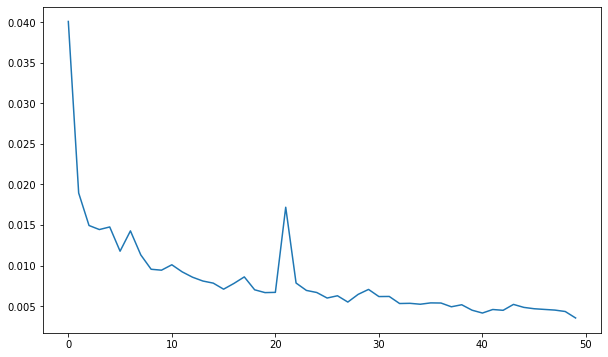

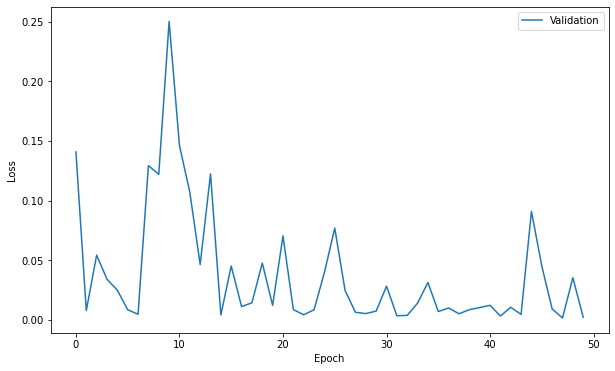

In [20]:
losses = pd.DataFrame(model.history.history)
losses['loss'].plot(figsize=(10,6), label='Loss');
plt.show()
losses['val_loss'].plot(figsize=(10,6), label='Validation');
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Testing

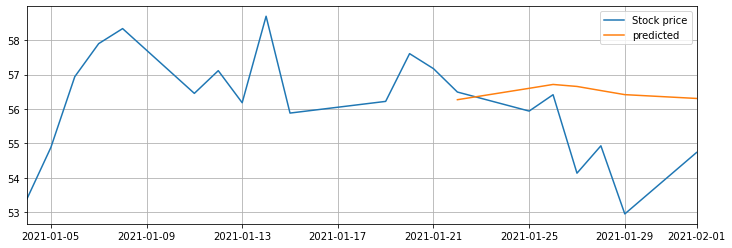

In [21]:
model.load_weights(f'model/{ticker}.h5')
future = 7
window_size = 120
preds = train_norm[-window_size:].tolist()

for i in range(future):
    seq = np.array(preds[-window_size:], dtype=np.float32)
    seq = np.reshape(seq, (seq.shape[1], seq.shape[0], 1))
    predict = model.predict(seq)
    preds.append(predict)

true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))
df1 = pd.DataFrame(true_predictions, index=df.tail(7).index, columns=['pred'])


plt.figure(figsize=(12,4))
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['Adj Close'].iloc[-20:], label='Stock price')
plt.plot(df1['pred'], label='predicted')
plt.legend()

# Absolute mean squared error


In [22]:
np.sqrt(mean_squared_error(true_predictions.reshape(1, -1), df['Adj Close'][-7:].values.reshape(1, -1)))

1.8493946941123263

# 2. LSTM network
lstm 4 layers 50 nodes

fully connected 1 l layer

In [28]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))


model.add(LSTM(units=50,))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Training
100 epochs

In [24]:
model.fit(X_train,
          y_train,
          epochs=100,
          validation_data=(X_test, y_test),
          batch_size=32 )
model.save_weights(f'model/{ticker}.h5')

Epoch 1/100
37/37 [==============================] - 6s 150ms/step - loss: 0.0323 - val_loss: 0.0608
Epoch 2/100
37/37 [==============================] - 4s 107ms/step - loss: 0.0162 - val_loss: 0.0086
Epoch 3/100
37/37 [==============================] - 4s 109ms/step - loss: 0.0111 - val_loss: 0.0235
Epoch 4/100
37/37 [==============================] - 4s 117ms/step - loss: 0.0103 - val_loss: 0.0567
Epoch 5/100
37/37 [==============================] - 4s 116ms/step - loss: 0.0089 - val_loss: 0.0165
Epoch 6/100
37/37 [==============================] - 4s 120ms/step - loss: 0.0082 - val_loss: 0.1118
Epoch 7/100
37/37 [==============================] - 4s 120ms/step - loss: 0.0078 - val_loss: 0.1329
Epoch 8/100
37/37 [==============================] - 4s 116ms/step - loss: 0.0084 - val_loss: 0.2387
Epoch 9/100
37/37 [==============================] - 4s 115ms/step - loss: 0.0089 - val_loss: 0.1280
Epoch 10/100
37/37 [==============================] - 4s 115ms/step - loss: 0.0070 - val_lo

# Loss

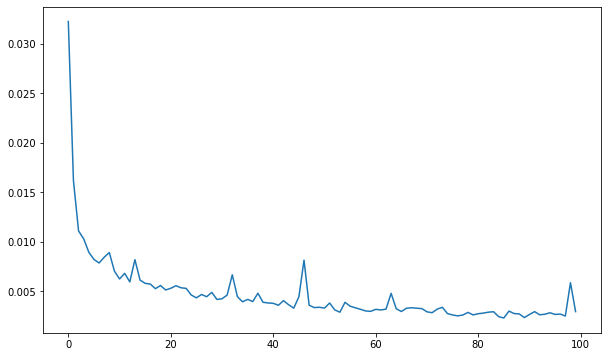

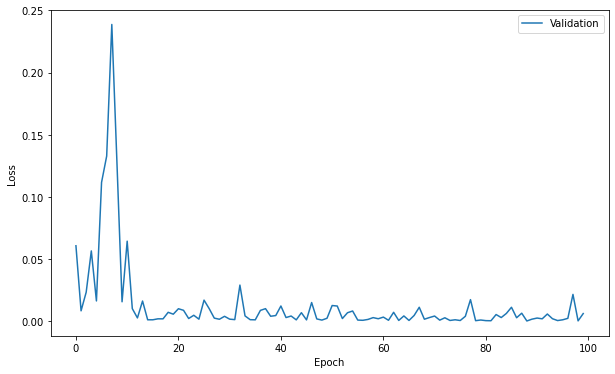

In [25]:
losses = pd.DataFrame(model.history.history)
losses['loss'].plot(figsize=(10,6), label='Loss');
plt.show()
losses['val_loss'].plot(figsize=(10,6), label='Validation');
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Testing

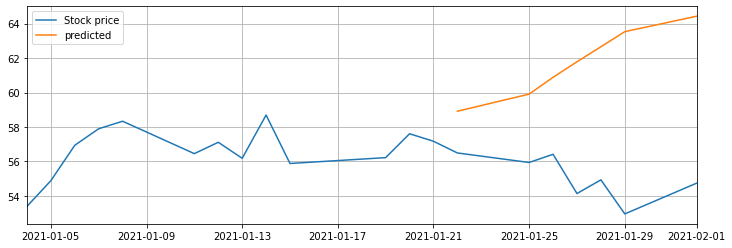

In [26]:
model.load_weights(f'model/{ticker}.h5')
future = 7
window_size = 120
preds = train_norm[-window_size:].tolist()

for i in range(future):
    seq = np.array(preds[-window_size:], dtype=np.float32)
    seq = np.reshape(seq, (seq.shape[1], seq.shape[0], 1))
    predict = model.predict(seq)
    preds.append(predict)

true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))
df1 = pd.DataFrame(true_predictions, index=df.tail(7).index, columns=['pred'])


plt.figure(figsize=(12,4))
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['Adj Close'].iloc[-20:], label='Stock price')
plt.plot(df1['pred'], label='predicted')
plt.legend()

# Absolute mean squared error


In [27]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(true_predictions.reshape(1, -1), df['Adj Close'][-7:].values.reshape(1, -1)))

7.227800595063086

150 epochs

In [29]:
np.random.seed(101)
model.fit(X_train,
          y_train,
          epochs=150,
          validation_data=(X_test, y_test),
          batch_size=32 )
model.save_weights(f'model/{ticker}.h5')

Epoch 1/150
37/37 [==============================] - 5s 140ms/step - loss: 0.0333 - val_loss: 0.0165
Epoch 2/150
37/37 [==============================] - 4s 116ms/step - loss: 0.0146 - val_loss: 0.0063
Epoch 3/150
37/37 [==============================] - 4s 118ms/step - loss: 0.0107 - val_loss: 0.0093
Epoch 4/150
37/37 [==============================] - 4s 119ms/step - loss: 0.0110 - val_loss: 0.0126
Epoch 5/150
37/37 [==============================] - 4s 119ms/step - loss: 0.0089 - val_loss: 0.0259
Epoch 6/150
37/37 [==============================] - 4s 119ms/step - loss: 0.0086 - val_loss: 0.0369
Epoch 7/150
37/37 [==============================] - 4s 119ms/step - loss: 0.0084 - val_loss: 0.0327
Epoch 8/150
37/37 [==============================] - 4s 119ms/step - loss: 0.0073 - val_loss: 0.0185
Epoch 9/150
37/37 [==============================] - 4s 119ms/step - loss: 0.0075 - val_loss: 0.0060
Epoch 10/150
37/37 [==============================] - 4s 117ms/step - loss: 0.0079 - val_lo

# Loss

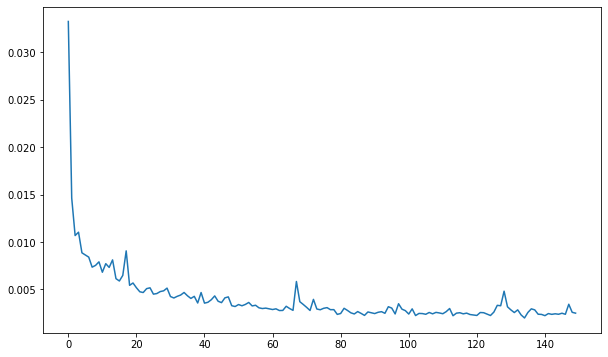

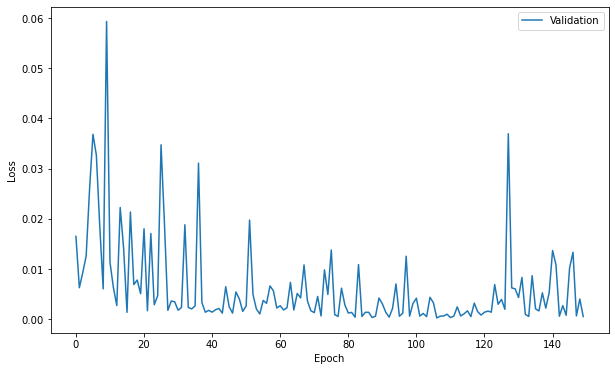

In [30]:
losses = pd.DataFrame(model.history.history)
losses['loss'].plot(figsize=(10,6), label='Loss');
plt.show()
losses['val_loss'].plot(figsize=(10,6), label='Validation');
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Testing

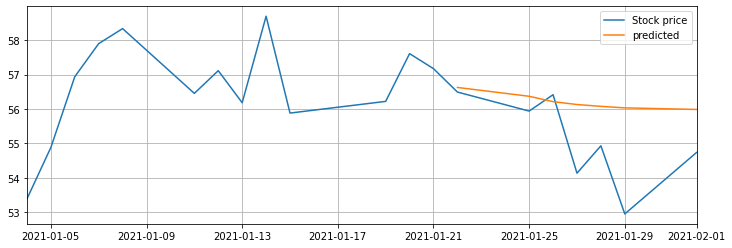

In [31]:
model.load_weights(f'model/{ticker}.h5')
future = 7
window_size = 120
preds = train_norm[-window_size:].tolist()

for i in range(future):
    seq = np.array(preds[-window_size:], dtype=np.float32)
    seq = np.reshape(seq, (seq.shape[1], seq.shape[0], 1))
    predict = model.predict(seq)
    preds.append(predict)

true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))
df1 = pd.DataFrame(true_predictions, index=df.tail(7).index, columns=['pred'])


plt.figure(figsize=(12,4))
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['Adj Close'].iloc[-20:], label='Stock price')
plt.plot(df1['pred'], label='predicted')
plt.legend()

# Absolute mean squared error


In [32]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(true_predictions.reshape(1, -1), df['Adj Close'][-7:].values.reshape(1, -1)))

1.538456013960839

# 3. LSTM network
lstm 2 layers 100 nodes

fully connected 1 l layer

In [34]:
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units=100,))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

150 epochs

In [38]:
np.random.seed(101)
model.fit(X_train,
          y_train,
          epochs=150,
          validation_data=(X_test, y_test),
          batch_size=32 )
model.save_weights(f'model/{ticker}.h5')

Epoch 1/150
37/37 [==============================] - 5s 131ms/step - loss: 0.0188 - val_loss: 0.0126
Epoch 2/150
37/37 [==============================] - 4s 113ms/step - loss: 0.0048 - val_loss: 0.0078
Epoch 3/150
37/37 [==============================] - 4s 114ms/step - loss: 0.0041 - val_loss: 0.0030
Epoch 4/150
37/37 [==============================] - 4s 113ms/step - loss: 0.0038 - val_loss: 0.0012
Epoch 5/150
37/37 [==============================] - 4s 111ms/step - loss: 0.0035 - val_loss: 0.0119
Epoch 6/150
37/37 [==============================] - 4s 113ms/step - loss: 0.0035 - val_loss: 0.0030
Epoch 7/150
37/37 [==============================] - 5s 131ms/step - loss: 0.0038 - val_loss: 0.0013
Epoch 8/150
37/37 [==============================] - 5s 122ms/step - loss: 0.0032 - val_loss: 0.0025
Epoch 9/150
37/37 [==============================] - 4s 121ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch 10/150
37/37 [==============================] - 5s 123ms/step - loss: 0.0028 - val_lo

# Loss

In [33]:
losses = pd.DataFrame(model.history.history)
losses['loss'].plot(figsize=(10,6), label='Loss');
plt.show()
losses['val_loss'].plot(figsize=(10,6), label='Validation');
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

KeyError: 'loss'

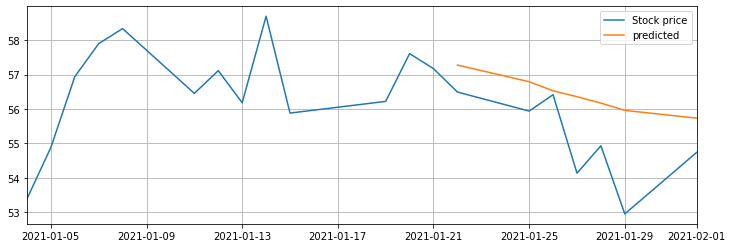

In [42]:
model.load_weights(f'model/{ticker}.h5')
future = 7
window_size = 120
preds = train_norm[-window_size:].tolist()

for i in range(future):
    seq = np.array(preds[-window_size:], dtype=np.float32)
    seq = np.reshape(seq, (seq.shape[1], seq.shape[0], 1))
    predict = model.predict(seq)
    preds.append(predict)

true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))
df1 = pd.DataFrame(true_predictions, index=df.tail(7).index, columns=['pred'])


plt.figure(figsize=(12,4))
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['Adj Close'].iloc[-20:], label='Stock price')
plt.plot(df1['pred'], label='predicted')
plt.legend()

In [43]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(true_predictions.reshape(1, -1), df['Adj Close'][-7:].values.reshape(1, -1)))

1.5969158869751903

In [45]:
np.random.seed(101)
model.fit(X_train,
          y_train,
          epochs=50,
          validation_data=(X_test, y_test),
          batch_size=32 )
model.save_weights(f'model/{ticker}.h5')

Epoch 1/50
37/37 [==============================] - 5s 128ms/step - loss: 0.0175 - val_loss: 0.0507
Epoch 2/50
37/37 [==============================] - 4s 103ms/step - loss: 0.0049 - val_loss: 0.0138
Epoch 3/50
37/37 [==============================] - 4s 104ms/step - loss: 0.0040 - val_loss: 0.0053
Epoch 4/50
37/37 [==============================] - 4s 103ms/step - loss: 0.0044 - val_loss: 0.0058
Epoch 5/50
37/37 [==============================] - 4s 109ms/step - loss: 0.0035 - val_loss: 0.0056
Epoch 6/50
37/37 [==============================] - 4s 100ms/step - loss: 0.0034 - val_loss: 0.0053
Epoch 7/50
37/37 [==============================] - 4s 99ms/step - loss: 0.0034 - val_loss: 0.0017
Epoch 8/50
37/37 [==============================] - 4s 98ms/step - loss: 0.0032 - val_loss: 0.0014
Epoch 9/50
37/37 [==============================] - 4s 100ms/step - loss: 0.0029 - val_loss: 0.0013
Epoch 10/50
37/37 [==============================] - 4s 102ms/step - loss: 0.0030 - val_loss: 0.0110
E

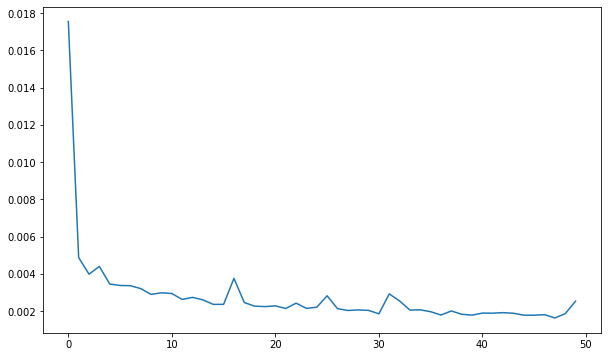

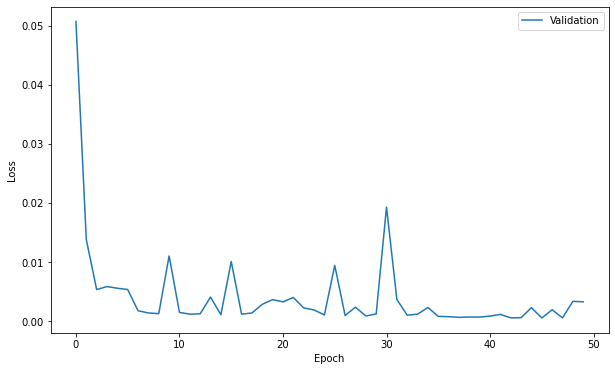

In [46]:
losses = pd.DataFrame(model.history.history)
losses['loss'].plot(figsize=(10,6), label='Loss');
plt.show()
losses['val_loss'].plot(figsize=(10,6), label='Validation');
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

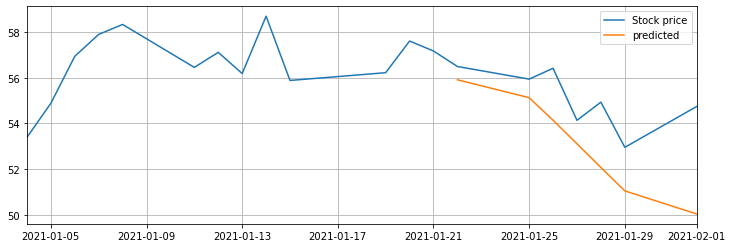

In [47]:
model.load_weights(f'model/{ticker}.h5')
future = 7
window_size = 120
preds = train_norm[-window_size:].tolist()

for i in range(future):
    seq = np.array(preds[-window_size:], dtype=np.float32)
    seq = np.reshape(seq, (seq.shape[1], seq.shape[0], 1))
    predict = model.predict(seq)
    preds.append(predict)

true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))
df1 = pd.DataFrame(true_predictions, index=df.tail(7).index, columns=['pred'])


plt.figure(figsize=(12,4))
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['Adj Close'].iloc[-20:], label='Stock price')
plt.plot(df1['pred'], label='predicted')
plt.legend()

In [48]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(true_predictions.reshape(1, -1), df['Adj Close'][-7:].values.reshape(1, -1)))

2.424344802653559

In [18]:
model.load_weights(f'model/{ticker}.h5')
future = 7
window_size = 120
preds = train_norm[-window_size:].tolist()

for i in range(future):
    seq = np.array(preds[-window_size:], dtype=np.float32)
    seq = np.reshape(seq, (seq.shape[1], seq.shape[0], 1))
    predict = model.predict(seq)
    preds.append(predict)

true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))
df1 = pd.DataFrame(true_predictions, index=df.tail(7).index, columns=['pred'])


plt.figure(figsize=(12,4))
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['Adj Close'].iloc[-20:], label='Stock price')
plt.plot(df1['pred'], label='predicted')
plt.legend()

ValueError: You are trying to load a weight file containing 7 layers into a model with 8 layers.